In [1]:
!pip install scikit-learn matplotlib pandas

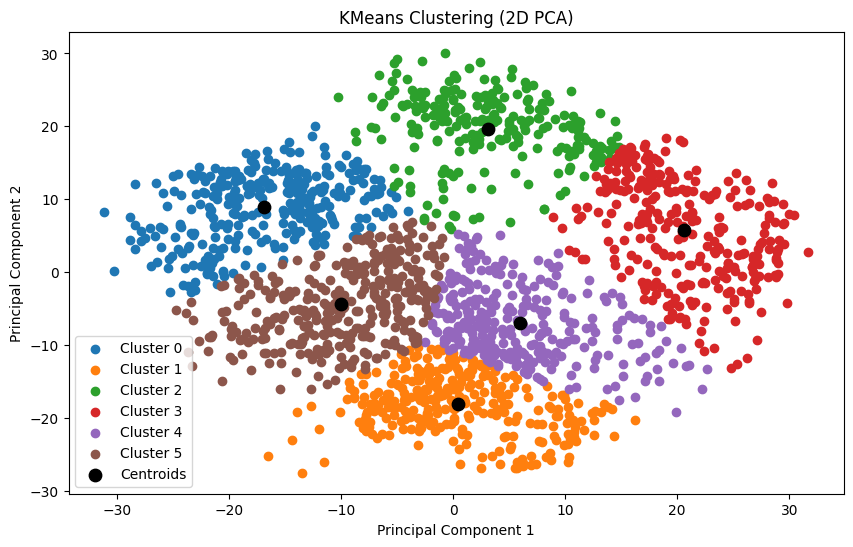

In [7]:

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure plots are displayed inline in the notebook
%matplotlib inline

data = load_digits()

pca = PCA(n_components=2)  # Reduce to 2D
data_df = pd.DataFrame(data=np.c_[data['data']],
                       columns=[f'pixel_{i}' for i in range(data['data'].shape[1])])
data_df['target'] = data['target']

# Transform the data
df = pca.fit_transform(data_df.drop(columns=['target']))

kmeans = KMeans(n_clusters=6)

# Predict the labels of clusters.
label = kmeans.fit_predict(df)

# Getting unique labels
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

# Plotting the results
plt.figure(figsize=(10, 6))
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color='k', label='Centroids')
plt.title('KMeans Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
